In [ ]:
#exemple de modèle de machine-learning sur le jeu de données du titanic

In [1]:
#import des bilbliothèques nécessaires
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [2]:
#enregistrement du fichier csv dans un gataframe
titanic= pd.read_csv('titanic_train.csv', sep=',')
#affichage des 10 premières lignes
titanic.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [3]:
#contenu du dataframe 891 lignes et 12 colonnes
titanic.shape

(891, 12)

In [4]:
#nom des colonnes
titanic.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [5]:
#infos sur le contenu du dataframe
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
#infos sur les colonnes non-numériques
titanic.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Berriman, Mr. William John",male,CA. 2343,B96 B98,S
freq,1,577,7,4,644


In [7]:
#fonction de découpage des données
#définition de la cible(colonne survived)
#enregistrement dans x des colonnes sélectionnées
def filter_data_set(dataset,listArgs):
    train_target=dataset['Survived']
    train_x=dataset[listArgs]
    return train_x,train_target

In [8]:
#appel de la fonction ci dessus pour former un premier jeu de données de test
#les colonnes sélecttionnées sont: nb epoux/femme, nb enfants/patents, prix du billet
train_0,target_0=filter_data_set(titanic,['SibSp','Parch','Fare'])

In [9]:
#affichage des premières lignes
train_0.head(4)

,SibSp,Parch,Fare
0,1,0,7.2500
1,1,0,71.2833
2,0,0,7.9250
3,1,0,53.1000


In [10]:
#fonction pour estimer la précision du classifier
from sklearn.model_selection import cross_val_score
def compute_score(classifier, trainsetX,traisetY):
    score_list= cross_val_score(classifier, trainsetX,traisetY,cv=5)
    return np.mean(score_list)

In [11]:
#premier test avec logistic regression
lr=LogisticRegression()
compute_score(lr,train_0,target_0)
#on obtiens 67,4% voyons comment l'améliorer

0.6746092524009792

Text(0.5, 1.0, 'Count of Survival')

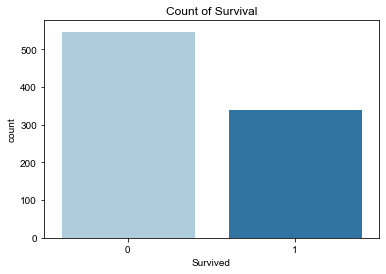

In [12]:
#visualisation du nb morts/ nb ayant survécu
fig,ax= plt.subplots(figsize=(6,4))
sns.set_style("darkgrid")
sns.color_palette("deep",2)
sns.countplot(x='Survived',data=titanic,palette=sns.color_palette("Paired",3))
plt.title("Count of Survival")

Text(0.5, 1.0, 'Impact of Pclass on Survived')

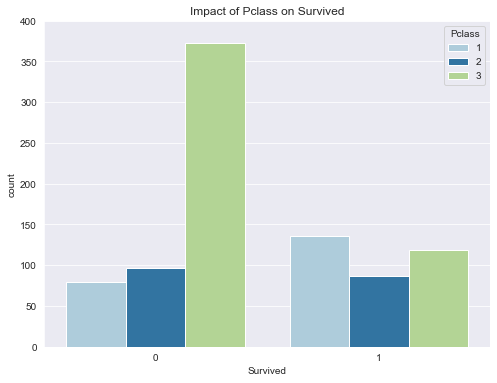

In [13]:
#visualisation de l'impact de la classe dans laquelle voyageaient les passagers sur leur survie
fig,ax= plt.subplots(figsize=(8,6))
sns.set_style("darkgrid")
sns.countplot(x='Survived',data=titanic, hue='Pclass',palette=sns.color_palette("Paired",10))
ax.set_ylim(0,400)
plt.title("Impact of Pclass on Survived")

Text(0.5, 1.0, 'Impact of Sex on Survived')

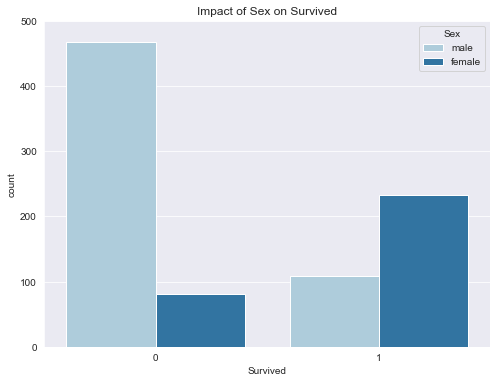

In [14]:
#visualisation de l'impact du sexe des passagers sur leur survie
fig,ax= plt.subplots(figsize=(8,6))
sns.set_style("darkgrid")
sns.countplot(x='Survived',data=titanic, hue='Sex',palette=sns.color_palette("Paired",3))
ax.set_ylim(0,500)
plt.title("Impact of Sex on Survived")

In [15]:
#traitement de la colonne pclass, et ajout à mon jeu de données
train_1=train_0.join(pd.get_dummies(titanic['Pclass'],prefix="SplitPclass_"))
train_1.head(5)

,SibSp,Parch,Fare,SplitPclass__1,SplitPclass__2,SplitPclass__3
0,1,0,7.2500,0,0,1
1,1,0,71.2833,1,0,0
2,0,0,7.9250,0,0,1
3,1,0,53.1000,1,0,0
4,0,0,8.0500,0,0,1


In [16]:
#second test
lr=LogisticRegression()
compute_score(lr,train_1,target_0)
#on peut constater que la précison éstimée est un peu mieux

0.6937040989266211

In [17]:
#traitement des données maquantes de le colonne age
#pour cet exemple j'ai choisi de combler les trous par l'age moyen des passagers à bord 
titanic["Age"]=titanic.Age.fillna(titanic.Age.median())
titanic.Age.count()

891

In [18]:
#taritement des données de la colonne sexe et ajout a mon dataframe
train_2=train_1.join(pd.get_dummies(titanic['Sex'],prefix="Split_Sex_"))
train_2.head(4)

,SibSp,Parch,Fare,SplitPclass__1,SplitPclass__2,SplitPclass__3,Split_Sex__female,Split_Sex__male
0,1,0,7.2500,0,0,1,0,1
1,1,0,71.2833,1,0,0,1,0
2,0,0,7.9250,0,0,1,1,0
3,1,0,53.1000,1,0,0,1,0


In [19]:
#ajout de la colonne age
train_2=train_2.join(titanic["Age"])
train_2.head()

,SibSp,Parch,Fare,SplitPclass__1,SplitPclass__2,SplitPclass__3,Split_Sex__female,Split_Sex__male,Age
0,1,0,7.2500,0,0,1,0,1,22.0
1,1,0,71.2833,1,0,0,1,0,38.0
2,0,0,7.9250,0,0,1,1,0,26.0
3,1,0,53.1000,1,0,0,1,0,35.0
4,0,0,8.0500,0,0,1,0,1,35.0


In [20]:
#3eme test sur mon dataframe bien préparé
lr=LogisticRegression()
compute_score(lr,train_2,target_0)
#on peut constater une nette amélioration de la précision éstimée

0.7867553825874083

In [21]:
#test sur le classifier KNN
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 5)
compute_score(knn,train_2,target_0)

0.7116063021781432

In [22]:
#test sur le classifier randomForest
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
compute_score(rf,train_2,target_0)

0.8126043562864854

In [23]:
#randomForest a obtenu le meilleur score 
#entrainement du modèle
classifier=rf.fit(train_2,target_0)

In [24]:
#données de léonardo dicaprio pour le test
leonardoDiCaprio=[[0,0,8.0,0,0,1,0,1,25.0]]

In [25]:
#prédiction du modèle sur la survie de léonardo dicaprio
result=rf.predict(leonardoDiCaprio)
print("leonardo will survive ?", result)
predictions= classifier.predict_proba(leonardoDiCaprio)
print("confidence/probability for [not sorviving/surviving]",predictions)

leonardo will survive ? [0]
confidence/probability for [not sorviving/surviving] [[1. 0.]]


In [27]:
#enregistrement du modèle pour l'appli flask
import joblib
joblib.dump(classifier, 'model1.gz')

['model1.gz']